In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix
from keras.regularizers import l2

In [3]:
img_size=(120,120)
batch_size=32
DataGen=ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
     width_shift_range=0.1,  
    height_shift_range=0.1, 
    shear_range=0.1,  
    brightness_range=[0.8, 1.2]  
)
val_dataGen=ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
    )
test_datagen = ImageDataGenerator(
    rescale=1./255
    )

In [4]:
train_data=DataGen.flow_from_directory(
    r"D:\python\Aiml\projects\catanddog_CNN\training_set\training_set",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)
val_data=val_dataGen.flow_from_directory(
    r"D:\python\Aiml\projects\catanddog_CNN\training_set\training_set",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)
test_data = test_datagen.flow_from_directory(
    r"D:\python\Aiml\projects\catanddog_CNN\test_set\test_set", 
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False 
)

Found 6404 images belonging to 2 classes.
Found 1601 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [5]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(120,120,3),kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.2),
    Conv2D(64, (3,3), activation='relu',kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.3),
    Conv2D(128, (3,3), activation='relu',kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.4),
    Flatten(),
    Dense(128, activation='relu',kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(1, activation='sigmoid') 
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0003) 
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy']) 

C:\Users\VICTUS\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    ),
     tf.keras.callbacks.ReduceLROnPlateau(  
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-6
    )
]

history=model.fit(train_data,epochs=25,batch_size=32,validation_data=val_data,
   callbacks=callbacks)

Epoch 1/25
201/201 ━━━━━━━━━━━━━━━━━━━━ 220s 1s/step - accuracy: 0.5790 - loss: 1.1543 - val_accuracy: 0.5191 - val_loss: 1.6259 - learning_rate: 3.0000e-04
Epoch 2/25
201/201 ━━━━━━━━━━━━━━━━━━━━ 302s 2s/step - accuracy: 0.6196 - loss: 0.9978 - val_accuracy: 0.5909 - val_loss: 1.4319 - learning_rate: 3.0000e-04
Epoch 3/25
201/201 ━━━━━━━━━━━━━━━━━━━━ 303s 2s/step - accuracy: 0.6352 - loss: 0.9546 - val_accuracy: 0.6452 - val_loss: 1.3311 - learning_rate: 3.0000e-04
Epoch 4/25
201/201 ━━━━━━━━━━━━━━━━━━━━ 355s 2s/step - accuracy: 0.6583 - loss: 0.9195 - val_accuracy: 0.6977 - val_loss: 0.9148 - learning_rate: 3.0000e-04
Epoch 5/25
201/201 ━━━━━━━━━━━━━━━━━━━━ 363s 2s/step - accuracy: 0.6576 - loss: 0.9035 - val_accuracy: 0.7108 - val_loss: 0.8422 - learning_rate: 3.0000e-04
Epoch 6/25
201/201 ━━━━━━━━━━━━━━━━━━━━ 355s 2s/step - accuracy: 0.6775 - loss: 0.8686 - val_accuracy: 0.6921 - val_loss: 0.8238 - learning_rate: 3.0000e-04
Epoch 7/25
201/201 ━━━━━━━━━━━━━━━━━━━━ 200s 855ms/step - 

In [13]:
model.save("cat_dog_cnn.h5")


64/64 ━━━━━━━━━━━━━━━━━━━━ 24s 385ms/step - accuracy: 0.8552 - loss: 0.5280
Test Loss: 0.5280, Test Accuracy: 0.8552


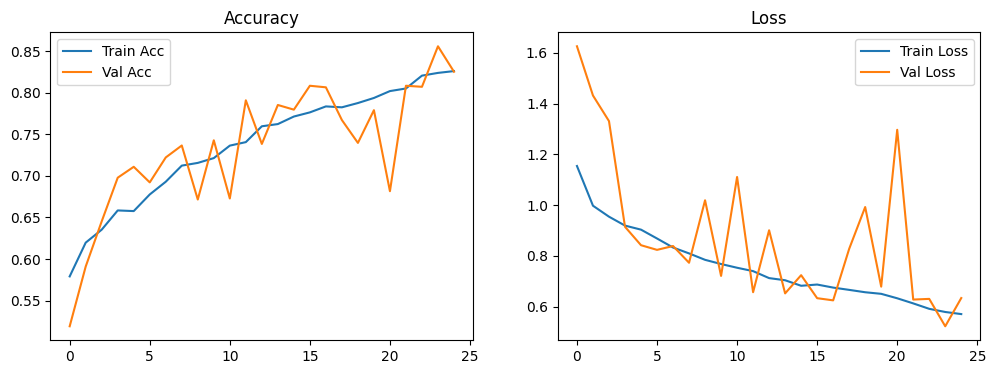

In [8]:

test_loss, test_acc = model.evaluate(test_data)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.show()

In [9]:
print("Train samples:", train_data.samples, "classes:", train_data.class_indices)
print("Val samples:", val_data.samples)
print("Test samples:", test_data.samples if 'test_data' in locals() else "No test set")

Train samples: 6404 classes: {'cats': 0, 'dogs': 1}
Val samples: 1601
Test samples: 2023


64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step


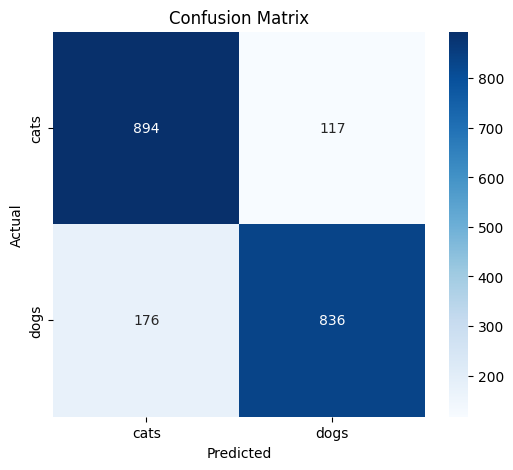

In [10]:
y_true = test_data.classes
y_pred_prob = model.predict(test_data)
y_pred = (y_pred_prob > 0.5).astype(int).ravel()
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=test_data.class_indices.keys(),
    yticklabels=test_data.class_indices.keys()
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from keras.preprocessing import image
import numpy as np

img_path = r"C:\Users\VICTUS\Downloads\pet4.jpeg"


img = image.load_img(img_path, target_size=img_size)
img_array = image.img_to_array(img)
img_array = img_array / 255.0  
img_array = np.expand_dims(img_array, axis=0) 
prediction = model.predict(img_array)
if prediction[0][0] > 0.5:
    print("It's a dog 🐶")
else:
    print("It's a cat 🐱")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
It's a cat 🐱
